# Librerías

In [1]:
#Importamos las librerías estándar
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Importamos las librerías de Keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

# Lectura de datos

In [3]:
#Vamos a programar nuestra primera red neuronal que puede encontrar patrones complejos
#En la librerías sklearn existe un dataset de prueba, nos ayudará a comenzar
from sklearn.datasets import make_moons

In [4]:
#Vamos a generar el dataset de pruebas con 1000 puntos, sin mucho desorden y en un estado aleatorio
#Nos generará un array de número en X y otro array de número en Y
x, y = make_moons(n_samples = 1000, noise = 0.1, random_state=0)

# Seleccion de features

In [5]:
#Los features X son un vector de dos dimensiones (x1, x2), son los inputs
x

array([[ 2.04271531,  0.51812416],
       [ 1.72033708, -0.13233804],
       [-0.26386729,  0.76382643],
       ...,
       [ 0.33823662, -0.43099924],
       [ 0.1269428 ,  0.09966251],
       [ 0.54241537, -0.47450809]])

In [6]:
#Seleccionamos el primer feature x1
x1 = x[:,0]
x1

array([ 2.04271531e+00,  1.72033708e+00, -2.63867286e-01, -9.80352066e-02,
        4.78476048e-01,  1.95457533e+00,  9.27604627e-01,  7.35488768e-02,
       -5.35063296e-01,  6.85488416e-01, -1.10467778e+00,  8.09585079e-02,
        1.42568842e+00,  9.97936083e-02,  8.93146845e-02,  8.47689203e-01,
        1.80178341e+00,  4.98411930e-01,  1.05956449e+00,  7.63637845e-01,
        8.20594931e-01, -9.46619487e-01, -5.40574293e-01, -3.64629409e-01,
        1.73757945e+00,  1.42803821e+00,  1.10278957e+00,  9.42568598e-01,
        1.04550985e+00,  8.92571963e-01,  1.59913091e+00,  8.39564857e-01,
        1.06976299e-01,  1.26951267e+00, -7.99289480e-01,  8.66961287e-01,
        1.89492483e+00, -6.78775299e-01,  1.85454295e+00, -7.96587212e-02,
        1.77471845e-01,  1.88911507e+00,  3.60794336e-01,  7.56888022e-01,
       -2.34437911e-01,  1.37708405e+00,  1.57210574e+00,  5.46533309e-01,
       -4.20815158e-01,  2.45095048e-01, -3.52160250e-01, -3.68231533e-01,
       -1.60962761e-01, -

In [7]:
#Seleccionamos el segundo feature x2
x2 = x[:,1]
x2

array([ 5.18124165e-01, -1.32338038e-01,  7.63826430e-01,  1.80081571e-01,
       -3.98777619e-01,  3.95480599e-01,  3.38161276e-01,  9.73532124e-01,
        8.06669574e-01, -5.62614968e-01,  7.60753225e-02,  2.21753253e-01,
       -5.41621433e-01,  8.35357622e-01, -7.03824209e-03,  3.42635237e-01,
        5.39835681e-02,  7.47077663e-01,  2.31719563e-01,  4.95022685e-01,
        2.95438223e-01,  1.55346224e-01,  7.58852411e-01,  9.51439102e-01,
       -2.13701459e-01, -3.72344606e-01,  1.64250509e-01,  6.42034188e-01,
       -4.11904359e-01,  8.03737436e-02, -3.73090726e-01, -3.73810057e-01,
       -1.65479802e-01, -6.11178783e-01,  5.36712231e-01, -5.19167580e-01,
        3.17065831e-01,  6.96395371e-01,  1.13076879e-01,  9.78910338e-01,
        1.12742659e+00,  5.50959989e-01, -2.05141781e-01, -2.86730018e-01,
        1.18855383e+00, -3.68769439e-01, -5.17765606e-01,  7.66827879e-01,
        9.04535197e-01, -1.78711581e-01,  7.90050896e-01,  1.00218607e+00,
        8.68930707e-01,  

# Selección de labels

In [8]:
#Los labels Y son un vector unidimensional (y1)
y

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,

# Graficando la data

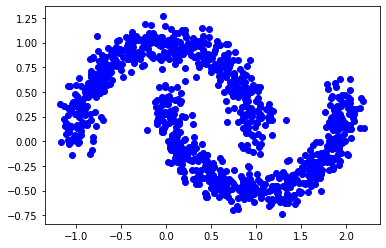

In [9]:
#Vamos a graficar esto en dos dimensiones
#En el eje de las abcisas colocaremos al feature X1
#En el eje de las ordenadas colocaremos al feature X2
#Colocaremos los puntos como bolitas (o) en azul (b)
#Tendríamos esto
plt.plot(x1, x2, 'ob')

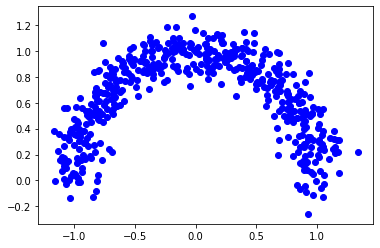

In [10]:
#Cada uno de estos puntos puede tomar dos valores según el label Y, "0" o "1"
#En el gráfico vamos a pintar como bolitas (o) en azul (b) los que toman el valor de "0"
#Vamos a usar la notación de filtrado para pintar primero aquellos labels que tengan un valor de "0"
plt.plot(x1[y == 0], x2[y == 0], 'ob')

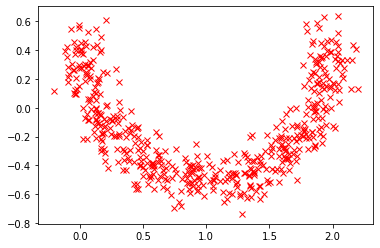

In [11]:
#En el gráfico vamos a pintar como equis (x) en rojo (r) los que toman el valor de "1"
plt.plot(x1[y == 1], x2[y == 1], 'xr')

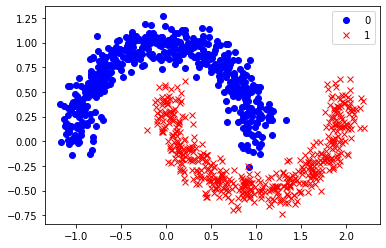

In [12]:
#Si juntamos ambos gráficos, tenemos lo siguiente
plt.plot(x1[y == 0], x2[y == 0], 'ob')
plt.plot(x1[y == 1], x2[y == 1], 'xr')

#También agregamos una leyenda, el primero gráfico que hemos agregado son los "0", el segundo los "1"
plt.legend(['0', '1'])

# Resolución del problema con un solo perceptrón

In [13]:
#Trateremos de encontrar un modelo que defina un patrón con sólo 1 perceptrón

In [14]:
#Divimos la data
#Random_state en la vida real se omite, se usa para comparar varias ejecuciones diferentes.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
#Vamos a solucionarlo primero con una regresión logística con 1 perceptrón
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [17]:
#Entrenamos el modelo
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
22/22 [==============================] - 1s 2ms/step - loss: 0.7246 - accuracy: 0.5643
Epoch 2/200
22/22 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.8571
Epoch 3/200
22/22 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8629
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2913 - accuracy: 0.8671
Epoch 5/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2737 - accuracy: 0.8729
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2615 - accuracy: 0.8771
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.8786
Epoch 8/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2463 - accuracy: 0.8843
Epoch 9/200
22/22 [==============================] - 0s 1ms/step - loss: 0.2416 - accuracy: 0.8829
Epoch 10/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2376 - accuracy: 0.8857
Epoch 11/

In [18]:
#Lo evaluamos
results = model.evaluate(x_test, y_test)
results

#Tiene un 84% de aciertos, ¿Esto es bueno?

10/10 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8467


[0.31793996691703796, 0.846666693687439]

# Graficamos el modelo encontrado por sólo 1 perceptrón

In [19]:
#Función que grafica el modelo
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])

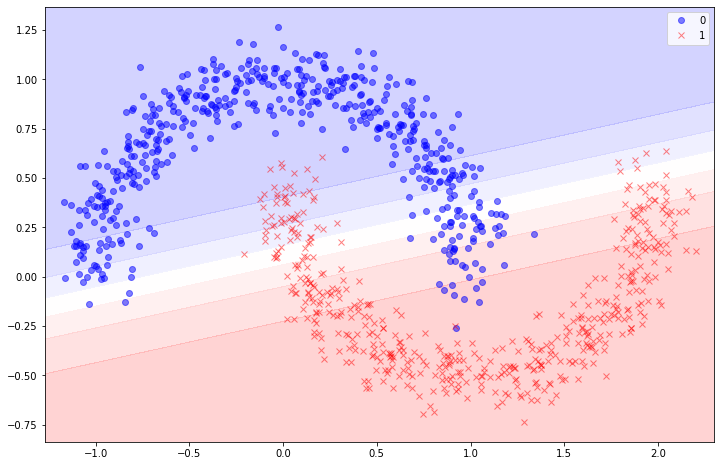

In [20]:
#Notamos como se encontró una recta que divide la data
#No del todo bien
plot_decision_boundary(model, x, y)

# Resolución del problema con una red neuronal

In [21]:
#Este es un patrón complejo, ya no lo podemos resolver con sólo un perceptrón
#Vamos a usar una red neuronal

In [22]:
#Instanciamos un modelo
model = Sequential()

In [23]:
#Agregamos la primera capa de:
# - 4 neuronas, 
# - 2 entradas (los features x1, x2)
# - Función de activación (tanh: tangente hiperbólica) Función de busqueda de patrones
model.add(Dense(4, input_shape=(2,), activation='tanh'))

In [24]:
#Agregamos una segunda capa de 
# - 2 neuronas
# - Función de activación (tanh: tangente hiperbólica)
#
# De aquí en adelante no es necesario definir el input, ya que cada neurona de la capa toma los 4 inputs de la primera capa
model.add(Dense(2, activation='tanh'))

In [25]:
#Como es un problema de clasificación binaria (SIGMOIDE), 
#agregamos la última capa que es la neurona de salida, la mejor función de activación es la sigmoide
model.add(Dense(1, activation='sigmoid'))

In [27]:
#Compilamos el modelo
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [28]:
#Entrenamos el modelo
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.3445 - accuracy: 0.8571
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.8843
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.8986
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.9129
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1201 - accuracy: 0.9557
Epoch 6/100
22/22 [==============================] - 0s 1ms/step - loss: 0.0687 - accuracy: 0.9771
Epoch 7/100
22/22 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.9871
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9900
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9957
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.0190 - accuracy: 0.9943
Epoch 11/

In [29]:
#Evaluamos el modelo
model.evaluate(x_test, y_test)

#Vemos que se obtuvo un 1, o sea un 100% de aciertos

10/10 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9933


[0.010156482458114624, 0.9933333396911621]

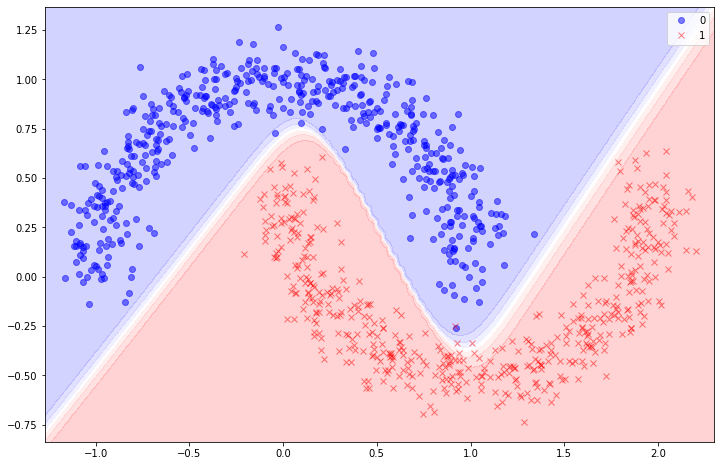

In [30]:
#Graficamos el modelo
plot_decision_boundary(model, x, y)

#Notamos que al agregar varios perceptrones estamos rompiendo la linealidad

In [31]:
#Obtenemos el accuracy de patrones descubiertos

#Obtenemos las predicciones
prediccion_train = model.predict(x_train)

#Comparamos con 0.5
y_train_prediccion = (prediccion_train > 0.5)

#Obtenemos el accuracy
accuracy_score(y_train, y_train_prediccion)

#Es de 99% de patrones descubiertos

0.9985714285714286

In [32]:
#Obtenemos el accuracy de aciertos al predecir casos nuevos

#Obtenemos las predicciones
prediccion_test = model.predict(x_test)

#Comparamos con 0.5
y_test_prediccion = (prediccion_test > 0.5)

#Obtenemos el accuracy
accuracy_score(y_test, y_test_prediccion)

#Es de 100%, es decir el modelo está clasificando bien todos los casos

0.9933333333333333